<h1><center>Übungszettel 8</center></h1>
<h2><center>Inhaltsbasierte Bild- und Videoanalyse - SoSe 19</center></h2>
<h3><center>Abgabe: Mi. 10.07.2019 - 08:00 Uhr</center></h3>

# Aufgabe 1 - DeepDream (2 + 2)

#### In dieser Aufgabe soll ein existierendes Modell genutzt werden um mithilfe von Gradient Ascent “DeepDream”-Bilder zu generieren.
#### a)	Verwenden Sie ein eigenes Bild und wenden Sie den DeepDream-Code unter https://keras.io/examples/deep_dream/ darauf an.

W0707 17:12:26.245722 16768 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:153: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 17:12:26.259714 16768 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 17:12:26.315683 16768 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 17:12:26.333674 16768 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 17:12:26.334673 16768 deprecation_wrapper.py:119] From e:\pythons\pyt

Model loaded.
Processing image shape (340, 510)
..Loss value at 0 : 0.99036175
..Loss value at 1 : 1.2872672
..Loss value at 2 : 1.6229275
..Loss value at 3 : 1.9341171
..Loss value at 4 : 2.2422125
..Loss value at 5 : 2.5577374
..Loss value at 6 : 2.8718355
..Loss value at 7 : 3.189451
..Loss value at 8 : 3.4880643
..Loss value at 9 : 3.7763228
..Loss value at 10 : 4.0557795
..Loss value at 11 : 4.373755
..Loss value at 12 : 4.623098
..Loss value at 13 : 4.9001055
..Loss value at 14 : 5.1651597
..Loss value at 15 : 5.43137
..Loss value at 16 : 5.692744
..Loss value at 17 : 5.959585
..Loss value at 18 : 6.2173204
..Loss value at 19 : 6.47591
Processing image shape (476, 714)


e:\pythons\python37\lib\site-packages\scipy\ndimage\interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


..Loss value at 0 : 1.4236823
..Loss value at 1 : 2.1367211
..Loss value at 2 : 2.7245007
..Loss value at 3 : 3.2135258
..Loss value at 4 : 3.6642234
..Loss value at 5 : 4.115883
..Loss value at 6 : 4.529704
..Loss value at 7 : 4.920059
..Loss value at 8 : 5.313696
..Loss value at 9 : 5.6803317
..Loss value at 10 : 6.0045033
..Loss value at 11 : 6.3281784
..Loss value at 12 : 6.7026443
..Loss value at 13 : 7.0405154
..Loss value at 14 : 7.360877
..Loss value at 15 : 7.6794157
..Loss value at 16 : 8.010736
..Loss value at 17 : 8.328198
..Loss value at 18 : 8.643979
..Loss value at 19 : 8.939735
Processing image shape (667, 1000)
..Loss value at 0 : 1.5206174
..Loss value at 1 : 2.2884307
..Loss value at 2 : 2.9524298
..Loss value at 3 : 3.5329347
..Loss value at 4 : 4.1093893
..Loss value at 5 : 4.7424917
..Loss value at 6 : 5.4741135
..Loss value at 7 : 6.4490304
..Loss value at 8 : 7.8645873
..Loss value at 9 : 9.942768


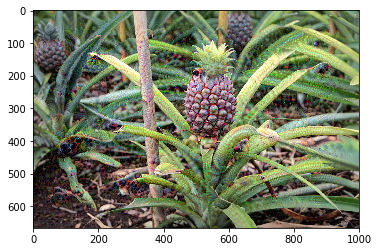

In [2]:
from __future__ import print_function
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
import scipy
import argparse

from keras.applications import inception_v3
from keras import backend as K

base_image_path = "ananas.jpg"
result_prefix = "dream_img"

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
settings = {
    'features': {
        'mixed2': 0.2,
        'mixed3': 0.5,
        'mixed4': 2.,
        'mixed5': 1.5,
    },
}

def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

K.set_learning_phase(0)

# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
dream = model.input
print('Model loaded.')

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    if layer_name not in layer_dict:
        raise ValueError('Layer ' + layer_name + ' not found in model.')
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        loss += coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
    else:
        loss += coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon())

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)


def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values


def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)


def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x


"""Process:

- Load the original image.
- Define a number of processing scales (i.e. image shapes),
    from smallest to largest.
- Resize the original image to the smallest scale.
- For every scale, starting with the smallest (i.e. current one):
    - Run gradient ascent
    - Upscale image to the next scale
    - Reinject the detail that was lost at upscaling time
- Stop when we are back to the original size.

To obtain the detail lost during upscaling, we simply
take the original image, shrink it down, upscale it,
and compare the result to the (resized) original image.
"""


# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 10.

img = preprocess_image(base_image_path)
if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

    
    
save_img(result_prefix + '.png', deprocess_image(np.copy(img)))

plt.imshow(deprocess_image(np.copy(img)))
plt.show()

#### b) Wählen Sie zur Visualisierung den Output einer Conv-Layer aus, wenden Sie den DeepDream-Code an und diskutieren Sie das Ergebnis.

(1, 165, 248, 80)
Processing image shape (695, 408)
..Loss value at 0 : 0.3639846
..Loss value at 1 : 0.50283456
..Loss value at 2 : 0.77937376
..Loss value at 3 : 1.1604307
..Loss value at 4 : 1.6342036
..Loss value at 5 : 2.1367044
..Loss value at 6 : 2.6395035
..Loss value at 7 : 3.1338449
..Loss value at 8 : 3.6384869
..Loss value at 9 : 4.1046224
..Loss value at 10 : 4.5637884
..Loss value at 11 : 5.041733
..Loss value at 12 : 5.4980664
..Loss value at 13 : 5.9385557
..Loss value at 14 : 6.397957
..Loss value at 15 : 6.8309727
..Loss value at 16 : 7.254941
..Loss value at 17 : 7.6573005
..Loss value at 18 : 8.066559
..Loss value at 19 : 8.448954
Processing image shape (974, 571)
..Loss value at 0 : 1.7899877
..Loss value at 1 : 2.8199105
..Loss value at 2 : 3.6729517
..Loss value at 3 : 4.3818064
..Loss value at 4 : 5.0287137
..Loss value at 5 : 5.608261
..Loss value at 6 : 6.155462
..Loss value at 7 : 6.686795
..Loss value at 8 : 7.167165
..Loss value at 9 : 7.609789
..Loss value

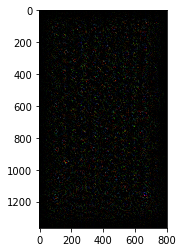

In [3]:
from keras import Model

model = model

layer_name = 'conv2d_4'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(preprocess_image(base_image_path))
print(intermediate_output.shape)

img = intermediate_output.reshape(1, 1364, 800, 3)

img = inception_v3.preprocess_input(img)

if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

save_img("ananas2.png", deprocess_image(np.copy(img)))

plt.imshow(deprocess_image(np.copy(img)))
plt.show()

# Aufgabe 2 - Fooling CNNs (3 + 8 Punkte)
#### a)	Verwenden Sie das bereits in Aufgabe 1 verwendete InceptionV3-Modell um das Bild "ananas.jpg" zu klassifizieren. Geben Sie den Klassennamen und die zugehörige Wahrscheinlichkeit aus. 


In [5]:
from __future__ import print_function
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np

from keras.preprocessing.image import load_img, save_img, img_to_array

K.set_learning_phase(0)

print("start loading Model \n")
model_pred = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=True)
print("Model loaded \n")


orig_img = preprocess_image("ananas.jpg")
shrunk_original_img = resize_img(orig_img, (299,299,3));

preds_orig = model_pred.predict(shrunk_original_img);
top_n = 1
readable_orig = inception_v3.decode_predictions(preds_orig, top=top_n)[0]
print("Predicted [TOP {}]".format(top_n))
for pred in readable_orig:
    print("{}: \t\t {}".format(pred[1], pred[2]))


start loading Model 

Model loaded 

Predicted [TOP 1]
pineapple: 		 0.9999333620071411


#### b)	Führen Sie minimale (für den Menschen nicht sichtbare) Änderungen an diesem Bild durch, so dass das Bild als "Dobermann" (id: 236) klassifiziert wird. Hinweis: Sie können hierfür den Gradient-Ascent Code aus Aufgabe 1 verwenden und den Loss entsprechend anpassen. 

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications import inception_v3
from keras import backend as K
from keras.preprocessing.image import save_img

model = inception_v3.InceptionV3()

model_input_layer = model.layers[0].input
model_output_layer = model.layers[-1].output

img = image.load_img("ananas.jpg", target_size=(299, 299))
original_image = image.img_to_array(img)

original_image /= 255.
original_image -= 0.5
original_image *= 2.

original_image = np.expand_dims(original_image, axis=0)

max_change_above = original_image + 0.1
max_change_below = original_image - 0.1

disguised_doberman = np.copy(original_image)

rate = 10

cost_function = model_output_layer[0, 236]
gradient_function = K.gradients(cost_function, model_input_layer)[0]
fetch_loss_and_grads = K.function([model_input_layer, K.learning_phase()], [cost_function, gradient_function])

cost = 0.0
while cost < 0.99:
    cost, gradients = fetch_loss_and_grads([disguised_doberman, 0])
    disguised_doberman += gradients * rate
    disguised_doberman = np.clip(disguised_doberman, max_change_below, max_change_above)
    disguised_doberman = np.clip(disguised_doberman, -1.0, 1.0)
    print(cost)

predictions = model.predict(disguised_doberman)

predicted_classes = inception_v3.decode_predictions(predictions, top=1)
imagenet_id, name, confidence = predicted_classes[0][0]
print("Predicted {0} with prob {1}".format(name, confidence))

disguised_doberman = disguised_doberman[0]
disguised_doberman /= 2.
disguised_doberman += 0.5
disguised_doberman *= 255.

save_img("doberman.png", disguised_doberman.reshape(299,299,3))


e:\pythons\python37\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
e:\pythons\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
e:\pythons\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
W0707 18:55:12.466117  3984 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 18:55:12.480110  3984 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 18:55:12.483108  3984 deprecation_wrapper.py:119] From e:\pythons\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The nam

1.0358042e-05
1.039268e-05
1.0427565e-05
1.0462625e-05
1.04981655e-05
1.0534104e-05
1.0570207e-05
1.0606788e-05
1.064369e-05
1.0680891e-05
1.0718315e-05
1.0756045e-05
1.0794619e-05
1.0833547e-05
1.0872834e-05
1.09123575e-05
1.0952304e-05
1.0992723e-05
1.1033388e-05
1.1074412e-05
1.1115696e-05
1.115745e-05
1.1199481e-05
1.1241885e-05
1.1284554e-05
1.1327227e-05
1.1370481e-05
1.14143595e-05
1.145843e-05
1.1502877e-05
1.1547498e-05
1.1592257e-05
1.1637233e-05
1.1682287e-05
1.1727804e-05
1.1773473e-05
1.1819211e-05
1.18653525e-05
1.19116285e-05
1.1957286e-05
1.2003541e-05
1.2050103e-05
1.2097274e-05
1.21449275e-05
1.21931635e-05
1.22417805e-05
1.22907795e-05
1.2340101e-05
1.2389739e-05
1.2439624e-05
1.2489998e-05
1.25410315e-05
1.25924225e-05
1.2644368e-05
1.2696744e-05
1.2749459e-05
1.28024285e-05
1.2855961e-05
1.2910065e-05
1.29646905e-05
1.3019959e-05
1.30760845e-05
1.3132915e-05
1.3190372e-05
1.3248303e-05
1.33071535e-05
1.33663625e-05
1.3426261e-05
1.3486592e-05
1.3547352e-05
1.360842